In [1]:
# importing packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn
import imblearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# reading in CSV
df = pd.read_csv('creditcard.csv')
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
190066,128675.0,1.908301,-0.401552,-3.097451,-0.622032,2.486640,3.233742,-0.464173,0.819237,0.874966,...,-0.218154,-0.599959,0.181458,0.586912,-0.048146,-0.073084,0.002446,-0.018991,61.16,0
6472,7740.0,1.023874,2.001485,-4.769752,3.819195,-1.271754,-1.734662,-3.059245,0.889805,0.415382,...,0.343283,-0.054196,0.709654,-0.372216,-2.032068,0.366778,0.395171,0.020206,1.00,1
169925,119933.0,-0.411177,1.247542,-0.574801,-0.136464,0.575551,-1.320732,0.804512,0.082755,-0.526066,...,0.410620,1.170738,-0.171397,-0.050942,-0.445156,-0.160102,0.112786,0.164709,20.75,0
31361,36337.0,-1.039504,-0.063318,3.672998,3.480074,-1.066632,1.419329,-0.426282,0.284342,0.546964,...,0.086411,0.832867,-0.174056,0.442634,0.168808,0.501599,-0.102883,-0.080087,107.17,0
185293,126610.0,0.271531,0.276062,0.195402,-1.573613,-0.107662,-1.155381,0.292537,-0.222503,-0.951144,...,0.182163,0.563054,-0.089366,-0.029637,-0.357233,-0.281287,0.081976,0.069527,12.05,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0.5, 1.0, 'No Fraud (0) vs. Fraud (1)')

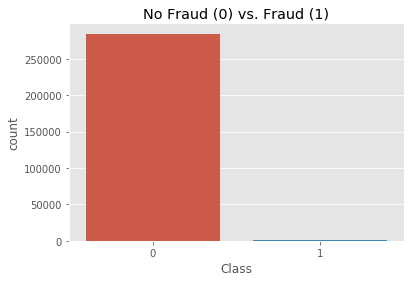

In [4]:
# taking a closer look at the class variable
sns.countplot('Class', data = df)
plt.title('No Fraud (0) vs. Fraud (1)')

In [5]:
# Get correlation between fields and target
corr = df.corr()
corr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447


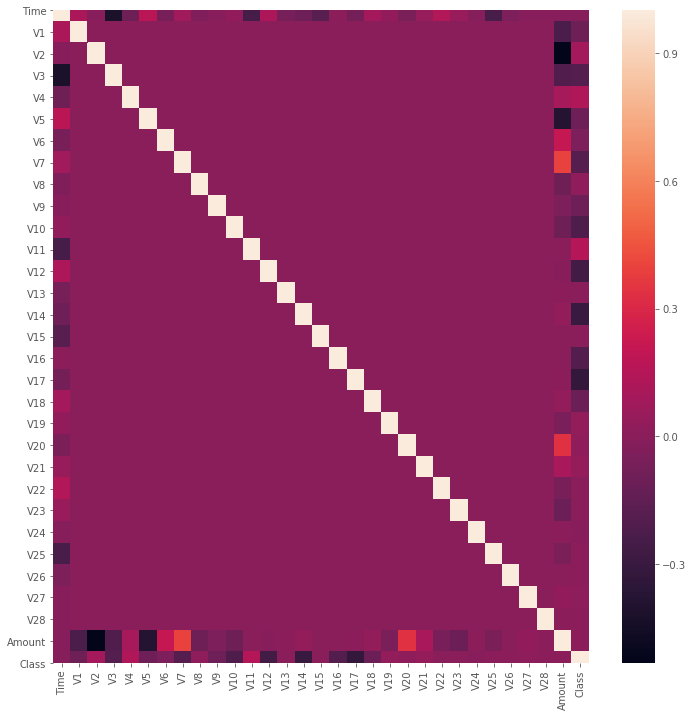

In [6]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr)

# As data already has been converted to few features via PCA, the features will have miniminal correlation to each other
# Only time has some interesting small correlation with other variables
# Amount is also highly correlated to a few variables but not the target

In [7]:
# i is the row number from 0 to number of columns - 1
# j is column number from i+1 to number of columns - 1
# The two for loops traverse the upper right of matrix since the correlation value of corr.iloc[i,j] = corr.iloc[j,i]
# We can skip out the lower left triangle matrix as it is repeat of top right triangle
# Note the j starts from i+1 as i=j is just the white diagonal of feature having perfect corr with itself and is ignored
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.1:
            print(str(df.columns[j]) + ' is correlated with ' + str(df.columns[i]) + ' with value of ' + str(corr.iloc[i,j]))
                

V1 is correlated with Time with value of 0.11739630597839038
V5 is correlated with Time with value of 0.17307212331039132
V12 is correlated with Time with value of 0.12434806837193435
V22 is correlated with Time with value of 0.14405905486146361
Class is correlated with V4 with value of 0.1334474862385853
Amount is correlated with V6 with value of 0.21598118022524546
Amount is correlated with V7 with value of 0.3973112781816456
Class is correlated with V11 with value of 0.15487564474346413
Amount is correlated with V20 with value of 0.3394034045461327
Amount is correlated with V21 with value of 0.10599892763770487


In [8]:
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.2:
            print(str(df.columns[j]) + ' is correlated with ' + str(df.columns[i]) + ' with value of ' + str(corr.iloc[i,j]))
                

Amount is correlated with V6 with value of 0.21598118022524546
Amount is correlated with V7 with value of 0.3973112781816456
Amount is correlated with V20 with value of 0.3394034045461327


In [9]:
dfplot = df[['Amount','V6','V7','V20','Class']]
dfplot['Amount'] = (dfplot['Amount'] - dfplot['Amount'].mean()) / dfplot['Amount'].std()
dfplot['Amt_V7'] = (dfplot['Amount'] ** 2 + dfplot['V7'] ** 2) ** 0.5
dfplot['Amt_V20'] = (dfplot['Amount'] ** 2 + dfplot['V20'] ** 2) ** 0.5

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [10]:
dfplot.head()

,Amount,V6,V7,V20,Class,Amt_V7,Amt_V20
0,0.244964,0.462388,0.239599,0.251412,0,0.342658,0.351020
1,-0.342474,-0.082361,-0.078803,-0.069083,0,0.351423,0.349372
2,1.160684,1.800499,0.791461,0.524980,0,1.404848,1.273888
3,0.140534,1.247203,0.237609,-0.208038,0,0.276058,0.251057
4,-0.073403,0.095921,0.592941,0.408542,0,0.597467,0.415084


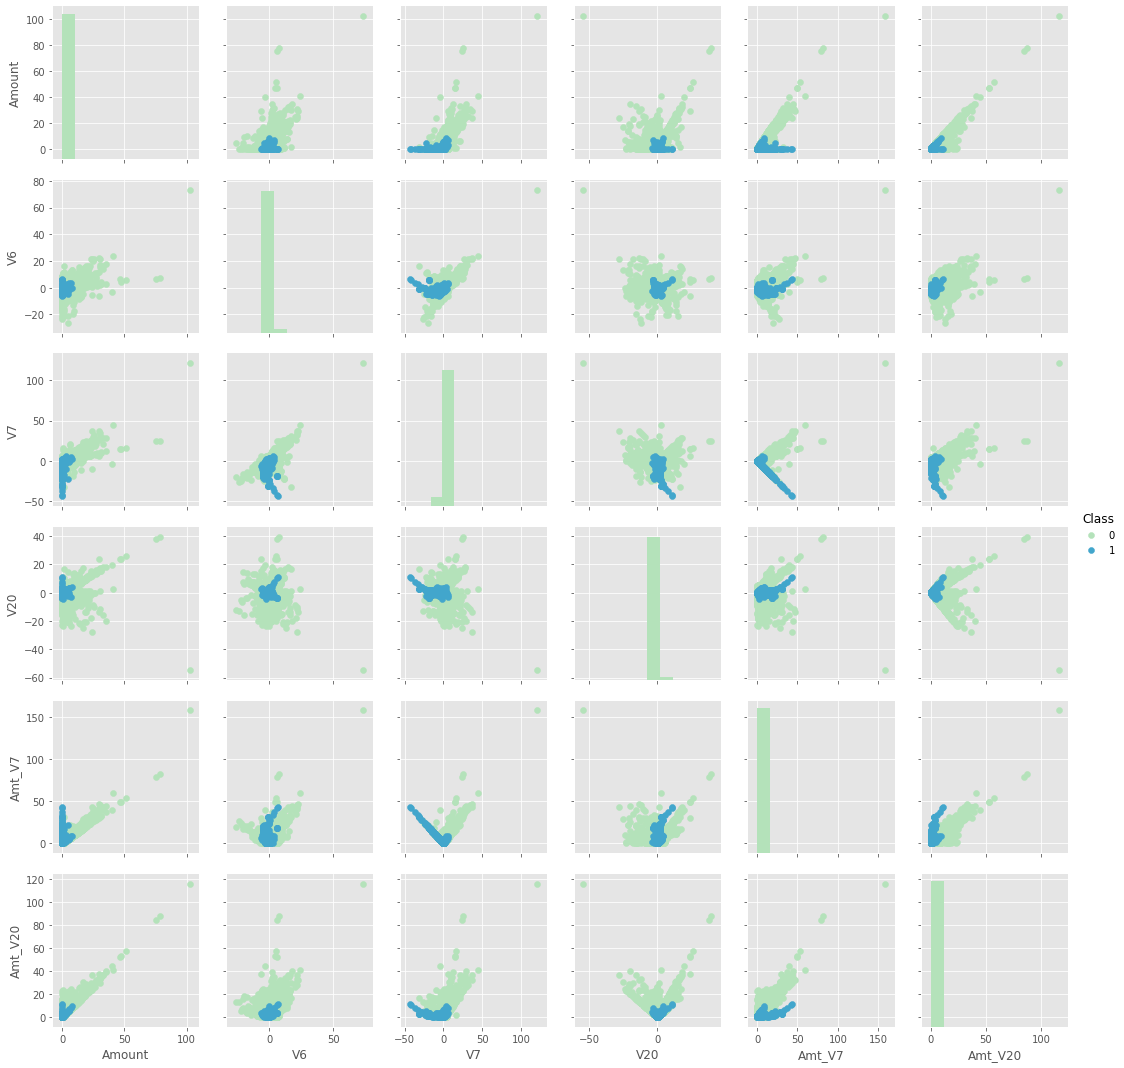

In [11]:
correlatedvarplots = sns.PairGrid(dfplot, vars=['Amount','V6','V7','V20','Amt_V7','Amt_V20'], hue='Class', palette='GnBu') 
# Set up diagonals to be histogram
correlatedvarplots = correlatedvarplots.map_diag(plt.hist)
# Set up non-diagonals to be scatter plot
correlatedvarplots = correlatedvarplots.map_offdiag(plt.scatter)
# Add legends on RHS
correlatedvarplots = correlatedvarplots.add_legend()

In [64]:
import statsmodels.discrete.discrete_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0]) # Get length of a row for num of vars
    for i in range(0, numVars):
        regressor_OLS = sm.Logit(Y, x, maxiter=200).fit() 
        # for loop to fit current set of all vars in x and response Y
        # As loop goes on, x gets smaller as columns are deleted, and columns keeping track of col names also edited
        maxVar = max(regressor_OLS.pvalues).astype(float)
        print('Regression model retrained with ' + str(numVars) + ' variables.')
        print('Max p value for a feature is: ' + str(maxVar))
        # get max p value and if its more than sig level, start deleting jth column
        # Since columns are getting deleted and x gets smaller, we need to update columns keeping track of column names
        # Hence the only way to ensure the deletion of right column
        # is to check the max p value with the current pvalues[j] in regression model
        # if they are same, then jth column safe to delete
        if maxVar > sl:
            print('Max p value > ' + str(sl) + ', feature will be removed.')
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print(str(j) + 'th column deleted: ' + str(columns[j]))
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    numVars -= 1
        else:
            print('All p values are above ' + str(sl) + '. Terminating model training')
            print('p values list: ' + str(regressor_OLS.pvalues))
            break
                    
    regressor_OLS.summary()
    return x, columns # Return x data and list of columns

In [13]:
# .values convert dataframe to np array
x = df.drop(['Class','Time'], axis=1)
varlist = x.columns.values
x = x.values
Y = df['Class'].values
print(varlist)

new_x, newvarlist = backwardElimination(x, Y, 0.05, varlist)

print('New variable list:')
print(newvarlist)


['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'Amount']
Optimization terminated successfully.
         Current function value: 0.021744
         Iterations 13
Regression model retrained with 29 variables.
Max p value for a feature is: 0.0008223777240315293
All p values are above 0.05. Terminating model training
p values list: [1.22626063e-011 0.00000000e+000 0.00000000e+000 2.31496716e-283
 0.00000000e+000 0.00000000e+000 0.00000000e+000 3.48971140e-077
 0.00000000e+000 0.00000000e+000 8.22377724e-004 8.50653594e-234
 3.56590712e-018 2.07620593e-013 3.96097221e-113 1.51796297e-273
 2.62253051e-029 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 3.41661137e-198 9.20480965e-068 1.11124175e-037
 5.08786840e-032 2.29908502e-014 0.00000000e+000 0.00000000e+000
 0.00000000e+000]
New variable list:
['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 

In [14]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# Drop the time
df = df.drop(['Time'], axis=1)

# Model Pipeline

In [73]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
from collections import Counter

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb 
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
import math
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

class modelpipeline:
    def __init__(self):
        pass
    
    def run_model(self, df, testratio, standardize, sampletype, modelname, text, CV):
        # df = df.drop('Time', axis=1)
        if standardize == True:
            df = self.standardize(df)
        if sampletype == 'smote':
            X_train, X_test, y_train, y_test = sampling.smote_oversample(df, testratio)
        elif sampletype == 'adasyn':
            X_train, X_test, y_train, y_test = sampling.adasyn_oversample(df, testratio)
        else:
            X_train, X_test, y_train, y_test = sampling.naive_oversample(df, testratio)
        store = self.build_model(X_train, X_test, y_train, y_test, text, modelname, CV)
        # test model with all actual fraud results
        store['actual_accuracy'] = evaluate.actual_acc(df, store['model'])
        return store
    
    def build_model(self, X_train, X_test, y_train, y_test, text, modelname, CV):
        if modelname == 'LogisticRegression':
            if CV == True:
                param_grid = dict(C=[0.8,1,1.2], max_iter=[300], solver=['liblinear'])
                LogRegression = LogisticRegression()
                model = GridSearchCV(LogRegression, param_grid, cv=5, scoring='f1', verbose=10)
                model.fit(X_train,y_train)
                print("Best f1 score: " + str(model.best_score_))
                print("Best parameters: " + str(model.best_params_))
            else:
                model = LogisticRegression(max_iter=300, C=0.8, solver='liblinear')
                model.fit(X_train,y_train)
        elif modelname == 'XGBoost':
            if CV == True:
                end_value = math.ceil(math.sqrt(X_train.shape[1]))
                start_value = end_value - 2       
                # treedepth = list(range(start_value, end_value+1, 2))
                param_grid = dict(n_estimators=[100], max_depth=[end_value])
                GradientBoost = GradientBoostingClassifier()
                model = GridSearchCV(GradientBoost, param_grid, cv=5, scoring='f1', verbose=10)
                model.fit(X_train,y_train)
                print("Best f1 score: " + str(model.best_score_))
                print("Best parameters: " + str(model.best_params_))
            else:
                model = xgb.XGBClassifier(seed=42, nthread=1, max_depth=math.ceil(math.sqrt(X_train.shape[1])),
                                          n_estimators=100, random_state=42)
                model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=5)
        elif modelname == 'RandomForest':
            if CV == True:
                start_value = math.ceil(math.sqrt(X_train.shape[1]))
                end_value = start_value + 11         
                treedepth = list(range(start_value, end_value, 5))
                param_grid = dict(random_state=[42], max_depth=treedepth, n_estimators=[100,150])
                RFC = RandomForestClassifier()
                model = GridSearchCV(RFC, param_grid, cv=5, scoring='f1', verbose=10)
                model.fit(X_train,y_train)
                print("Best f1 score: " + str(model.best_score_))
                print("Best parameters: " + str(model.best_params_))
            else:
                treedepth = math.ceil(math.sqrt(X_train.shape[1]))
                model = RandomForestClassifier(random_state=42, max_depth=treedepth, n_estimators=100)
                model.fit(X_train,y_train)
        else:
            # Parameters based on gridsearchcv of modelname = logistic regresion
            # Leave parameter blank for modelname to run this instance of logistic regression
            model = LogisticRegression(C=0.8, max_iter=300, solver='liblinear')
            model.fit(X_train,y_train)
        
        y_predict = model.predict(X_test)
        results = evaluate.model_results(y_test, y_predict, text)
        store = {"model": model, "X_train": X_train, "X_test": X_test, "y_train": y_train, 
                 "y_test": y_test, "results": results}
        print("Model fitting and results are complete!")
        return store
    
    def standardize(self, df):
        # Variables already standardized except for Amount
        # columns = df.columns.values.tolist()
        # columns.remove('Class')
        for column in ['Amount']:
            df[column] = (df[column] - df[column].mean()) / df[column].std()
        return df

class sampling:
    def __init__(self):
        pass
    @staticmethod
    def naive_oversample(df, testratio):
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testratio, random_state=42)
        ros = RandomOverSampler(random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def smote_oversample(df, testratio):
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testratio, random_state=42)
        X_train, y_train = SMOTE().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for SMOTE:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test
    
    @staticmethod
    def adasyn_oversample(df, testratio):
        X = df.drop(['Class'], axis=1)
        y = df['Class']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testratio, random_state=42)
        X_train, y_train = ADASYN().fit_resample(X_train, y_train)
        # train test split keeps X_test and y_test as pd series, oversampler converts X_train, y_train to numpy
        # Convert all to numpy array for XGBoost to not have bugs
        X_test = X_test.values
        y_test = y_test.values
        print("Number of Xs and Ys for ADASYN:")
        print(sorted(Counter(y_train).items()))
        print("Oversampling is complete!")
        return X_train, X_test, y_train, y_test



class evaluate:
    def __init__(self):
        pass
    
    @staticmethod
    def model_results(y_test, y_predict, text):
        cm = metrics.confusion_matrix(y_test, y_predict)
        print(cm)
        RFC_CM = pd.DataFrame(cm, ['Actual 0', 'Actual 1'], ['Predict 0', 'Predict 1'])
        sns.heatmap(RFC_CM, annot=True, annot_kws={"size": 16}, cmap='Greens', linewidths=1, fmt='g')# font size
        sns.set(font_scale=1.4)#for label size
        plt.title("Confusion Matrix for " + text)

        # fix for mpl bug that cuts off top/bottom of seaborn viz
        b, t = plt.ylim() 
        b += 0.5 
        t -= 0.5 
        plt.ylim(b, t) 
        plt.show() 

        accuracy = metrics.accuracy_score(y_test, y_predict)
        print('Accuracy: ' + str(accuracy))
        sensitivity = cm[1][1] / (cm[1][1] + cm[1][0])
        recall = sensitivity
        print('Sensitivity: ' + str(sensitivity))
        specificity = cm[0][0] / (cm[0][0] + cm[0][1])
        print('Specificity: ' + str(specificity))
        precision = cm[1][1] / (cm[1][1] + cm[0][1])
        print('Precision: ' + str(precision))
        f1 = 2 * (recall * precision)/(recall + precision)
        print('f1 score: ' + str(f1))
        auc = evaluate.ROC(y_test, y_predict, text)
        results = {"accuracy": accuracy, "sensitivity": sensitivity, "specificity": specificity, 
                   "precision": precision, "f1": f1, "auc": auc}
        print("Model classification metrics have finished calculating!")
        return results
    
    @staticmethod
    def ROC(y_test, y_predict, text):
        # IMPORTANT: first argument is true values, second argument is predicted probabilities
        auc = metrics.roc_auc_score(y_test, y_predict)
        print("AUC value is: " + str(auc))
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
        plt.plot(fpr, tpr)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.title('ROC curve for ' + text)
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.grid(True)
        return auc

    @staticmethod
    def actual_acc(df, model):
        allpositive = df[df['Class'] == 1].copy()
        x_positive = allpositive.drop(['Class'], axis=1)
        y_positive = allpositive['Class']
        y_pospredict = model.predict(x_positive)
        accuracy_positive = metrics.accuracy_score(y_positive, y_pospredict)
        print("Accuracy with all fraud results is " + str(accuracy_positive * 100) + "%")
        return accuracy_positive

In [74]:
modelpipeline = modelpipeline()

In [28]:
df.shape

(284807, 30)

Oversampling is complete!
[[56743   121]
 [   11    87]]


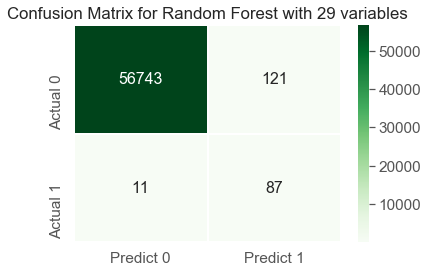

Accuracy: 0.9976826656367402
Sensitivity: 0.8877551020408163
Specificity: 0.9978721159257175
Precision: 0.4182692307692308
f1 score: 0.5686274509803921
AUC value is: 0.9428136089832668
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.08943089430895%


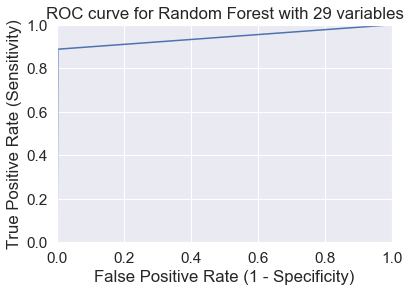

In [29]:
ranforest_29 = modelpipeline.run_model(df, 0.2, True, "naive", "RandomForest", "Random Forest with 29 variables", False)

Oversampling is complete!
[[56736   128]
 [   11    87]]


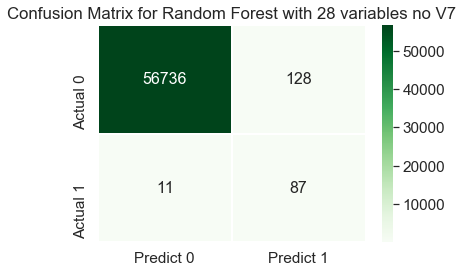

Accuracy: 0.997559776693234
Sensitivity: 0.8877551020408163
Specificity: 0.9977490151941475
Precision: 0.4046511627906977
f1 score: 0.5559105431309904
AUC value is: 0.9427520586174819
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.69918699186992%


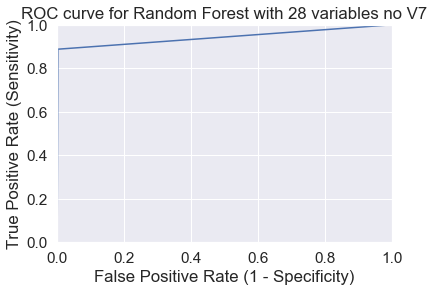

In [30]:
# Drop V7 and rerun
df2 = df.drop(columns=['V7'], axis=1)
ranforest_v7 = modelpipeline.run_model(df2, 0.2, True, "naive", "RandomForest", "Random Forest with 28 variables no V7", False)

Oversampling is complete!
[[56745   119]
 [   11    87]]


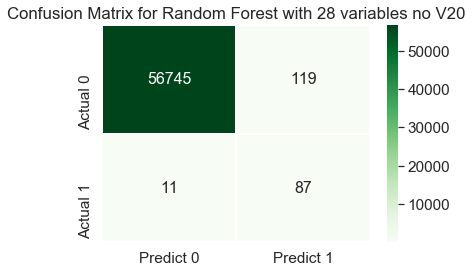

Accuracy: 0.9977177767634563
Sensitivity: 0.8877551020408163
Specificity: 0.9979072875633089
Precision: 0.4223300970873786
f1 score: 0.5723684210526315
AUC value is: 0.9428311948020626
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.69918699186992%


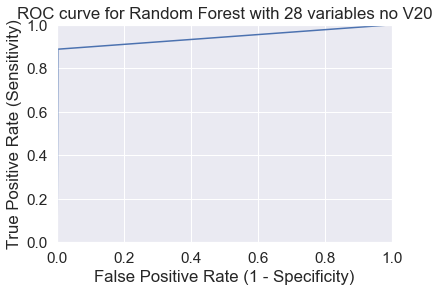

In [33]:
# Drop V20 and rerun
df2 = df.drop(columns=['V20'], axis=1)
ranforest_v20 = modelpipeline.run_model(df2, 0.2, True, "naive", "RandomForest", "Random Forest with 28 variables no V20", False)

Oversampling is complete!
[[56741   123]
 [   11    87]]


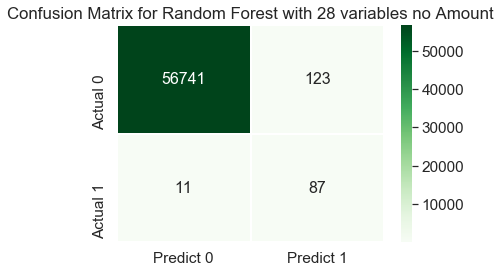

Accuracy: 0.9976475545100242
Sensitivity: 0.8877551020408163
Specificity: 0.9978369442881261
Precision: 0.4142857142857143
f1 score: 0.564935064935065
AUC value is: 0.9427960231644712
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.4959349593496%


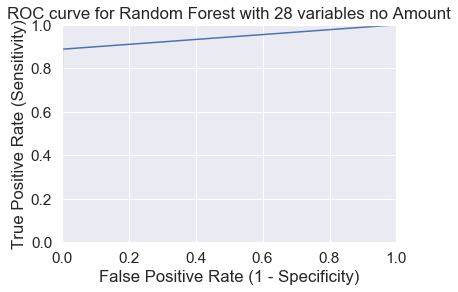

In [34]:
# Drop Amount and rerun
df2 = df.drop(columns=['Amount'], axis=1)
ranforest_v20 = modelpipeline.run_model(df2, 0.2, False, "naive", "RandomForest", "Random Forest with 28 variables no Amount", False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Preparation of dataset for variable selection and correlation measurement

In [3]:
df_notime = df.drop('Time', axis=1)

In [4]:
featurenames = list(df_notime.columns.values)
featurenames.remove('Class')

In [5]:
print(featurenames)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [10]:
# Run the class sampling above to be able to do naive oversampling

# Sampling data before looking at correlation matrix
X_train, X_test, y_train, y_test = sampling.naive_oversample(df_notime, 0.2)
X_train = pd.DataFrame(X_train, columns=featurenames)
X_test = pd.DataFrame(X_train, columns=featurenames)
y_train = pd.DataFrame(y_train, columns=['Class'])
y_test = pd.DataFrame(y_test, columns=['Class'])
all_train = pd.concat([X_train, y_train], axis=1)
all_test = pd.concat([X_test, y_test], axis=1)

Oversampling is complete!


In [11]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76


In [12]:
y_train.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [13]:
all_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,0
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,0
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,0
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,0
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,0


In [14]:
all_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,1.0
1,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,0.0
2,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,0.0
3,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,0.0
4,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,0.0


# Correlation matrix for naive oversampling

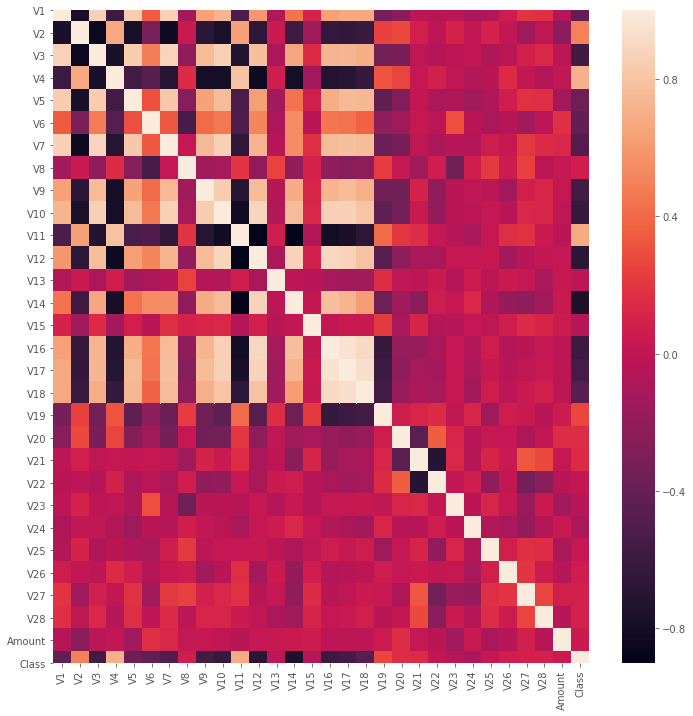

In [15]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(all_train.corr())

In [69]:
corr = all_train.corr()

print("Dimensions of corr matrix:")
print(corr.shape)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
            print(str(df.columns[j]) + ' is correlated with ' + str(df.columns[i]) + ' with value of ' + str(corr.iloc[i,j]))
                

Dimensions of corr matrix:
(30, 30)
V16 is correlated with V15 with value of 0.9527222779659853
V17 is correlated with V15 with value of 0.9082742658105205
V17 is correlated with V16 with value of 0.9404942043825227


In [ ]:
# Variables to take note
# Every variable from V1-V17 except for 5, 7, 12, 14

In [19]:
corr.iloc[29:,:]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,-0.424655,0.498406,-0.570851,0.715211,-0.366131,-0.41734,-0.48452,0.077844,-0.561073,-0.631997,...,0.144205,0.006675,-0.034963,-0.093598,0.020905,0.065959,0.093646,0.095103,0.046628,1.0


In [20]:
class_corr = corr.iloc[29:,:]

In [26]:
class_corr['V1']

Class   -0.424655
Name: V1, dtype: float64

In [55]:
varlist = all_train.columns.values
class_corr = corr.iloc[29:,:]

for i in range(30):
    if abs(class_corr[varlist[i]].values[0]) < 0.05:
        print("Column " + str(varlist[i]) + " has correlation of " + str(class_corr[varlist[i]].values[0]) +  " with Class")

Column V13 has correlation of -0.022926994989805827 with Class
Column V22 has correlation of 0.006674583686939916 with Class
Column V23 has correlation of -0.03496329869951398 with Class
Column V25 has correlation of 0.020904828675948076 with Class
Column Amount has correlation of 0.046627852859380835 with Class


In [57]:
for i in range(30):
    if abs(class_corr[varlist[i]].values[0]) < 0.1:
        print("Column " + str(varlist[i]) + " has correlation of " + str(class_corr[varlist[i]].values[0]) +  " with Class")

Column V8 has correlation of 0.07784381635581406 with Class
Column V13 has correlation of -0.022926994989805827 with Class
Column V15 has correlation of -0.05002465025942525 with Class
Column V22 has correlation of 0.006674583686939916 with Class
Column V23 has correlation of -0.03496329869951398 with Class
Column V24 has correlation of -0.0935976591848952 with Class
Column V25 has correlation of 0.020904828675948076 with Class
Column V26 has correlation of 0.06595914125343054 with Class
Column V27 has correlation of 0.09364550069810622 with Class
Column V28 has correlation of 0.09510332730685406 with Class
Column Amount has correlation of 0.046627852859380835 with Class


In [70]:
# Check for V15, 16 and 17
for i in (14,15,16):
    print(varlist[i])
    print(class_corr[varlist[i]].values[0])

V15
-0.05002465025942525
V16
-0.5919373895446429
V17
-0.5542168230845207


# Using train set that has been naively oversampled, try to do backward elimination to remove some features

In [68]:
import statsmodels.discrete.discrete_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0]) # Get length of a row for num of vars
    for i in range(0, numVars):
        regressor_OLS = sm.Logit(Y, x, maxiter=200).fit() 
        # for loop to fit current set of all vars in x and response Y
        # As loop goes on, x gets smaller as columns are deleted, and columns keeping track of col names also edited
        maxVar = max(regressor_OLS.pvalues).astype(float)
        print('Regression model retrained with ' + str(numVars) + ' variables.')
        print('Max p value for a feature is: ' + str(maxVar))
        # get max p value and if its more than sig level, start deleting jth column
        # Since columns are getting deleted and x gets smaller, we need to update columns keeping track of column names
        # Hence the only way to ensure the deletion of right column
        # is to check the max p value with the current pvalues[j] in regression model
        # if they are same, then jth column safe to delete
        if maxVar > sl:
            print('Max p value > ' + str(sl) + ', feature will be removed.')
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print(str(j) + 'th column deleted: ' + str(columns[j]))
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    numVars -= 1
        else:
            print('All p values are above ' + str(sl) + '. Terminating model training')
            print('p values list: ' + str(regressor_OLS.pvalues))
            break
                    
    regressor_OLS.summary()
    return x, columns # Return x data and list of columns

# Correlation matrix for smote oversampling

### Run SMOTE sampling

In [87]:
# Run the class sampling above to be able to do naive oversampling

# Sampling data before looking at correlation matrix
X_train, X_test, y_train, y_test = sampling.smote_oversample(df_notime, 0.2)
X_train = pd.DataFrame(X_train, columns=featurenames)
X_test = pd.DataFrame(X_train, columns=featurenames)
y_train = pd.DataFrame(y_train, columns=['Class'])
y_test = pd.DataFrame(y_test, columns=['Class'])
all_train = pd.concat([X_train, y_train], axis=1)
all_test = pd.concat([X_test, y_test], axis=1)

Number of Xs and Ys for SMOTE:
[(0, 227451), (1, 227451)]
Oversampling is complete!


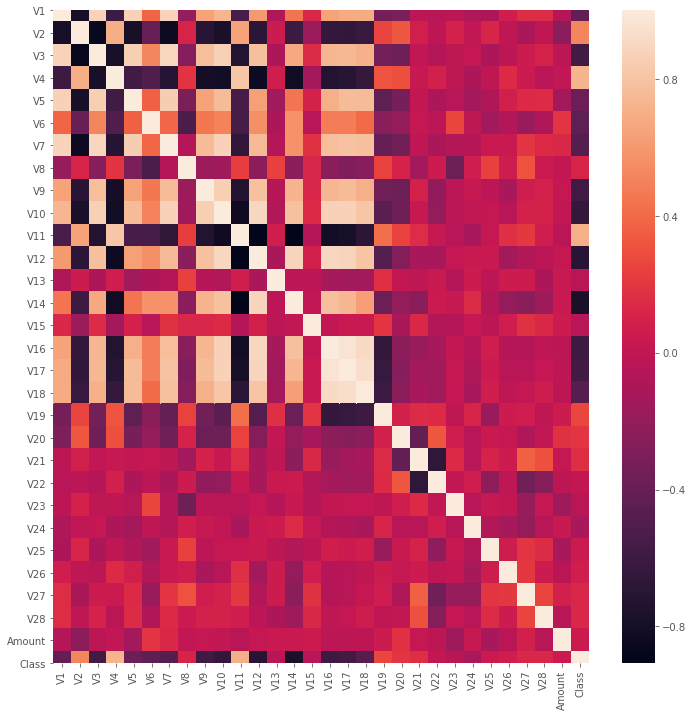

In [88]:
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(all_train.corr())

In [89]:
corr = all_train.corr()

print("Dimensions of corr matrix:")
print(corr.shape)

for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if abs(corr.iloc[i,j]) >= 0.9:
            print(str(df.columns[j]) + ' is correlated with ' + str(df.columns[i]) + ' with value of ' + str(corr.iloc[i,j]))
                

Dimensions of corr matrix:
(30, 30)
V11 is correlated with V9 with value of 0.9026790133459716
V11 is correlated with V10 with value of -0.9057816767483187
V15 is correlated with V11 with value of 0.9030624266783641
V16 is correlated with V15 with value of 0.9568422360379054
V17 is correlated with V15 with value of 0.9114344428728972
V17 is correlated with V16 with value of 0.9404339751441819


In [90]:
# Variables to take note
# Every variable from V9, 10, 11, 15, 16, 17

In [91]:
corr.iloc[29:,:]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Class,-0.417259,0.518499,-0.573137,0.725496,-0.379316,-0.442266,-0.486703,0.109735,-0.586194,-0.650682,...,0.161099,0.003013,-0.03304,-0.113939,0.04002,0.073364,0.12251,0.123143,0.043603,1.0


In [92]:
class_corr = corr.iloc[29:,:]

In [93]:
class_corr['V1']

Class   -0.417259
Name: V1, dtype: float64

In [94]:
varlist = all_train.columns.values
class_corr = corr.iloc[29:,:]

for i in range(30):
    print("Column " + str(varlist[i]) + " has correlation of " + str(class_corr[varlist[i]].values[0]) +  " with Class")

Column V1 has correlation of -0.41725934205274595 with Class
Column V2 has correlation of 0.518498737408424 with Class
Column V3 has correlation of -0.5731371643170001 with Class
Column V4 has correlation of 0.7254962000336809 with Class
Column V5 has correlation of -0.379316244164841 with Class
Column V6 has correlation of -0.44226580198475013 with Class
Column V7 has correlation of -0.4867030811365793 with Class
Column V8 has correlation of 0.10973465161919535 with Class
Column V9 has correlation of -0.5861944685642274 with Class
Column V10 has correlation of -0.6506818904894245 with Class
Column V11 has correlation of 0.7074367489876603 with Class
Column V12 has correlation of -0.7022472878401144 with Class
Column V13 has correlation of -0.027657014246922223 with Class
Column V14 has correlation of -0.7745628581978722 with Class
Column V15 has correlation of -0.03888141131615159 with Class
Column V16 has correlation of -0.6033205971925504 with Class
Column V17 has correlation of -0.

In [95]:
varlist = all_train.columns.values
class_corr = corr.iloc[29:,:]

for i in range(30):
    if abs(class_corr[varlist[i]].values[0]) < 0.05:
        print("Column " + str(varlist[i]) + " has correlation of " + str(class_corr[varlist[i]].values[0]) +  " with Class")

Column V13 has correlation of -0.027657014246922223 with Class
Column V15 has correlation of -0.03888141131615159 with Class
Column V22 has correlation of 0.0030133872913561863 with Class
Column V23 has correlation of -0.033040099794146766 with Class
Column V25 has correlation of 0.04001971117335157 with Class
Column Amount has correlation of 0.04360277486052886 with Class


In [96]:
for i in range(30):
    if abs(class_corr[varlist[i]].values[0]) < 0.1:
        print("Column " + str(varlist[i]) + " has correlation of " + str(class_corr[varlist[i]].values[0]) +  " with Class")

Column V13 has correlation of -0.027657014246922223 with Class
Column V15 has correlation of -0.03888141131615159 with Class
Column V22 has correlation of 0.0030133872913561863 with Class
Column V23 has correlation of -0.033040099794146766 with Class
Column V25 has correlation of 0.04001971117335157 with Class
Column V26 has correlation of 0.07336386123167801 with Class
Column Amount has correlation of 0.04360277486052886 with Class


In [97]:
# Check for V15, 16 and 17
for i in (14,15,16):
    print(varlist[i])
    print(class_corr[varlist[i]].values[0])

V15
-0.03888141131615159
V16
-0.6033205971925504
V17
-0.5711982021261706


# Using train set that has been naively oversampled, try to do backward elimination to remove some features

In [98]:
import statsmodels.discrete.discrete_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0]) # Get length of a row for num of vars
    for i in range(0, numVars):
        regressor_OLS = sm.Logit(Y, x, maxiter=200).fit() 
        # for loop to fit current set of all vars in x and response Y
        # As loop goes on, x gets smaller as columns are deleted, and columns keeping track of col names also edited
        maxVar = max(regressor_OLS.pvalues).astype(float)
        print('Regression model retrained with ' + str(numVars) + ' variables.')
        print('Max p value for a feature is: ' + str(maxVar))
        # get max p value and if its more than sig level, start deleting jth column
        # Since columns are getting deleted and x gets smaller, we need to update columns keeping track of column names
        # Hence the only way to ensure the deletion of right column
        # is to check the max p value with the current pvalues[j] in regression model
        # if they are same, then jth column safe to delete
        if maxVar > sl:
            print('Max p value > ' + str(sl) + ', feature will be removed.')
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    print(str(j) + 'th column deleted: ' + str(columns[j]))
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    numVars -= 1
        else:
            print('All p values are above ' + str(sl) + '. Terminating model training')
            print('p values list: ' + str(regressor_OLS.pvalues))
            break
                    
    regressor_OLS.summary()
    return x, columns # Return x data and list of columns

In [99]:
# .values convert dataframe to np array
# We drop V15 and V17 as they are highly correlated with other variables
# While V17 has high correlation, V16 has even higher correlation. Since V16/V17 are correlated, one is removed
x = all_train.drop(['V11','V15','V17'], axis=1)
varlist = x.columns.values
x = all_train.values
Y = all_train['Class'].values

print('Old variable list:')
print(varlist)

new_x, newvarlist = backwardElimination(x, Y, 0.05, varlist)

print('New variable list:')
print(newvarlist)

Old variable list:
['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V12' 'V13' 'V14'
 'V16' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26' 'V27' 'V28'
 'Amount' 'Class']


D:\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

Oversampling is complete!
[[56738   126]
 [   11    87]]


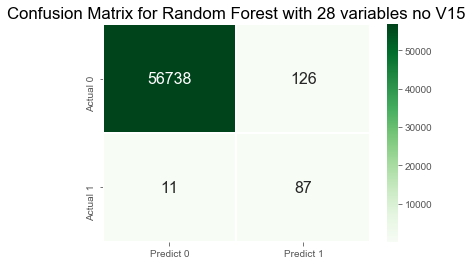

Accuracy: 0.9975948878199501
Sensitivity: 0.8877551020408163
Specificity: 0.9977841868317389
Precision: 0.4084507042253521
f1 score: 0.5594855305466238
AUC value is: 0.9427696444362775
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.08943089430895%


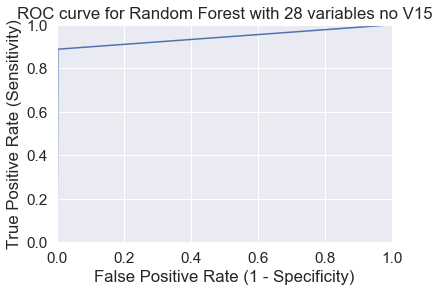

In [100]:
# Drop V15 and rerun
df15 = df.drop(columns=['V15'], axis=1)
ranforest_v20 = modelpipeline.run_model(df15, 0.2, True, "naive", "RandomForest", "Random Forest with 28 variables no V15", False)

Oversampling is complete!
[[56767    97]
 [   11    87]]


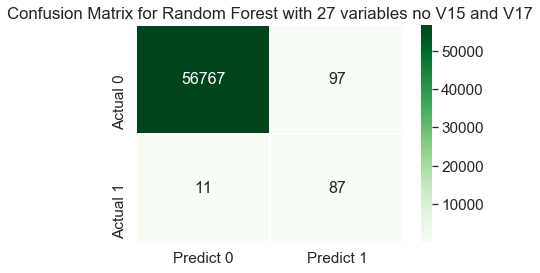

Accuracy: 0.9981039991573329
Sensitivity: 0.8877551020408163
Specificity: 0.9982941755768149
Precision: 0.47282608695652173
f1 score: 0.6170212765957447
AUC value is: 0.9430246388088156
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.69918699186992%


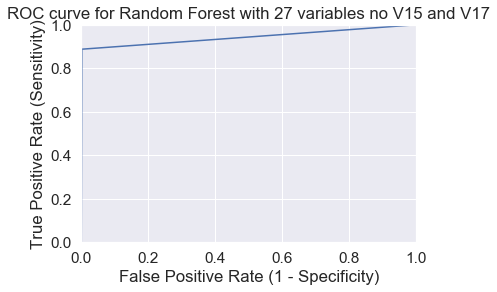

In [101]:
# Drop V15 and V17 and rerun
df1517 = df.drop(columns=['V20'], axis=1)
ranforest_v20 = modelpipeline.run_model(df1517, 0.2, True, "naive", "RandomForest", "Random Forest with 27 variables no V15 and V17", False)

Oversampling is complete!
[[56740   124]
 [   12    86]]


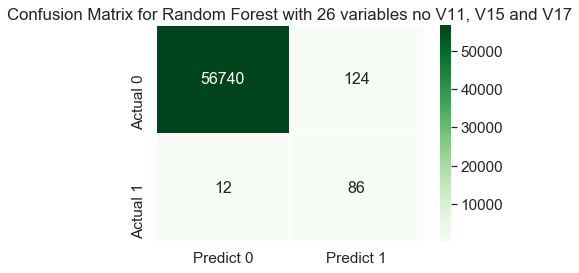

Accuracy: 0.9976124433833081
Sensitivity: 0.8775510204081632
Specificity: 0.9978193584693303
Precision: 0.4095238095238095
f1 score: 0.5584415584415585
AUC value is: 0.9376851894387468
Model classification metrics have finished calculating!
Model fitting and results are complete!
Accuracy with all fraud results is 93.29268292682927%


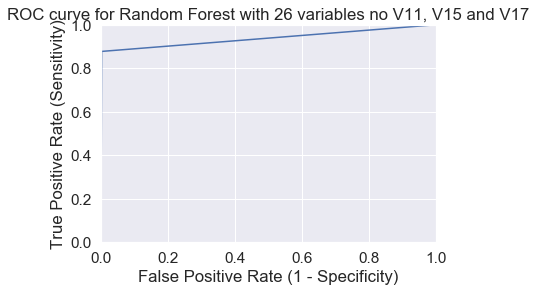

In [102]:
# Drop V11, V15 and V17 and rerun
df111517 = df.drop(columns=['V11','V15','V17'], axis=1)
ranforest_v20 = modelpipeline.run_model(df111517, 0.2, True, "naive", "RandomForest", "Random Forest with 26 variables no V11, V15 and V17", False)